In [ ]:
BeH_p_errors = [[], []]
with open('./BeH_p_errors.txt', 'r') as f:
    for line in f:
        q, err_g, err_e = line.strip().split('\t')
        BeH_p_errors[0].append(float(err_g))
        BeH_p_errors[1].append(float(err_e))

F2_errors = [[], []]
with open('./F2_errors.txt', 'r') as f:
    for line in f:
        q, err_g, err_e = line.strip().split('\t')
        F2_errors[0].append(float(err_g))
        F2_errors[1].append(float(err_e))

HF_errors = [[], []]
with open('./HF_errors.txt', 'r') as f:
    for line in f:
        q, err_g, err_e = line.strip().split('\t')
        HF_errors[0].append(float(err_g))
        HF_errors[1].append(float(err_e))

HCl_errors = [[], []]
with open('./HCl_errors.txt', 'r') as f:
    for line in f:
        q, err_g, err_e = line.strip().split('\t')
        HCl_errors[0].append(float(err_g))
        HCl_errors[1].append(float(err_e))

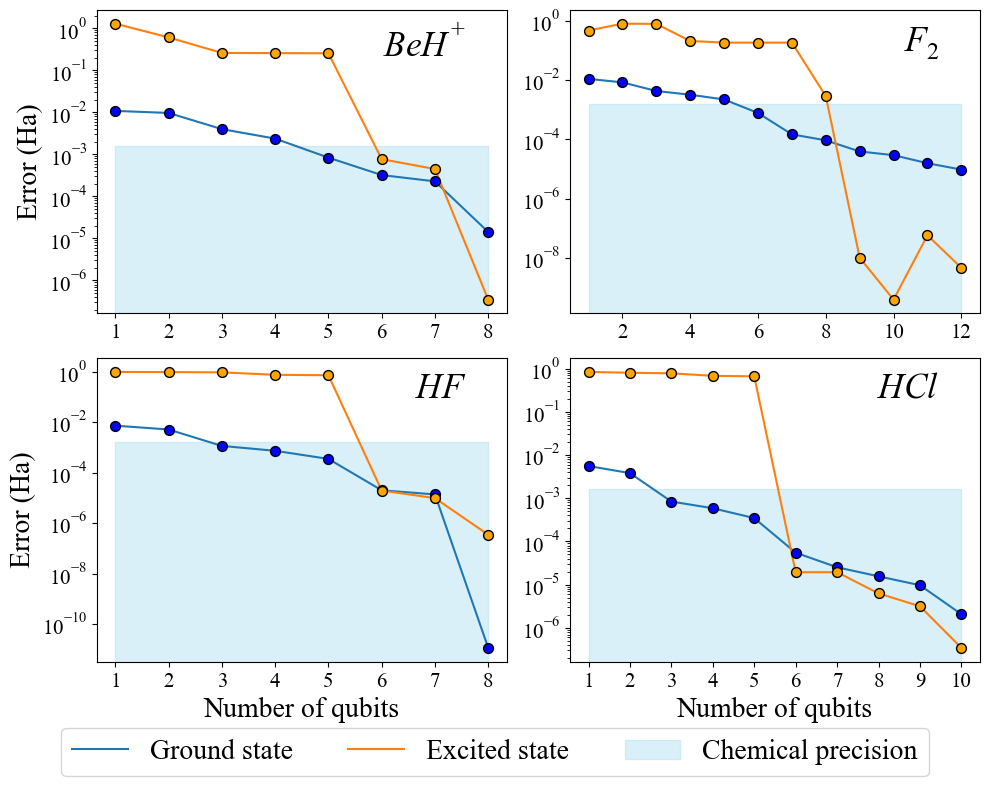

In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import rcParams
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator

rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']
rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.rm'] = 'Times New Roman'
rcParams['mathtext.it'] = 'Times New Roman:italic'
rcParams['mathtext.bf'] = 'Times New Roman:bold'
tick_fontsize = 15
label_fontsize = 20

def plot_errors(ax, qubits, errors, title):
    ax.plot(qubits, errors[0], label='Ground state')
    ax.plot(qubits, errors[1], label='Excited state')
    ax.scatter(qubits, errors[0], color='blue', s=50, zorder=5, edgecolor='black')
    ax.scatter(qubits, errors[1], color='orange', s=50, zorder=5, edgecolor='black')
    ax.fill_between(qubits, 0, 0.0016, color='skyblue', alpha=0.3, label='Chemical precision')
    ax.set_yscale('log')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.text(0.9, 0.95, title, transform=ax.transAxes, ha='right', va='top', fontsize=25)
    ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)  

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# BeH+
max_qubits = 8
qubits = list(range(1, max_qubits + 1))
plot_errors(axs[0, 0], qubits, BeH_p_errors, r'$BeH^+$')

# F2
max_qubits = 12
qubits = list(range(1, max_qubits + 1))
plot_errors(axs[0, 1], qubits, F2_errors, r'$F_2$')

# HF
max_qubits = 8
qubits = list(range(1, max_qubits + 1))
plot_errors(axs[1, 0], qubits, HF_errors, r'$HF$')

# HCl
max_qubits = 10
qubits = list(range(1, max_qubits + 1))
plot_errors(axs[1, 1], qubits, HCl_errors, r'$HCl$')


axs[1, 0].set_xlabel('Number of qubits', fontsize=label_fontsize)
axs[1, 1].set_xlabel('Number of qubits', fontsize=label_fontsize)
axs[0, 0].set_ylabel('Error (Ha)', fontsize=label_fontsize)
axs[1, 0].set_ylabel('Error (Ha)', fontsize=label_fontsize)

handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3, fontsize=label_fontsize)

plt.tight_layout(rect=[0, 0.07, 1, 1])
